In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting data

In [4]:
#Leer csv final
df_final = pd.read_csv(r'C:\Users\Germán\Github\ProyectoFinal\data\dffinal.csv')


Objetivo del proyecto:

1- Recomendaciones personalizadas para los clientes. (En el EDA hemos podido observar ciertas tendencias de mercado que son interesantes para generar recomedaciones según las características de los coches) </br>

**2- Predicciones precisas del precio del precio del coche deseado**

Aqui trabajaremos en identificar que variables vamos a utilizar para poder realizar un modelo de predicción que nos indique el valor estimado de un coche segun ciertas características.

In [7]:
df_final.columns

Index(['make', 'model', 'version', 'fuel', 'year', 'kms', 'power', 'shift',
       'price', 'state'],
      dtype='object')

In [6]:
#Eliminar 'location', 'publish_date', 'dealer_address','dealer_zip_code', 'dealer_city', 'dealer_country_code', 'lat', 'long'
df_final = df_final.drop(['location', 'publish_date', 'dealer_address','dealer_zip_code', 'dealer_city', 'dealer_country_code', 'lat', 'long'], axis=1)

# Heat map

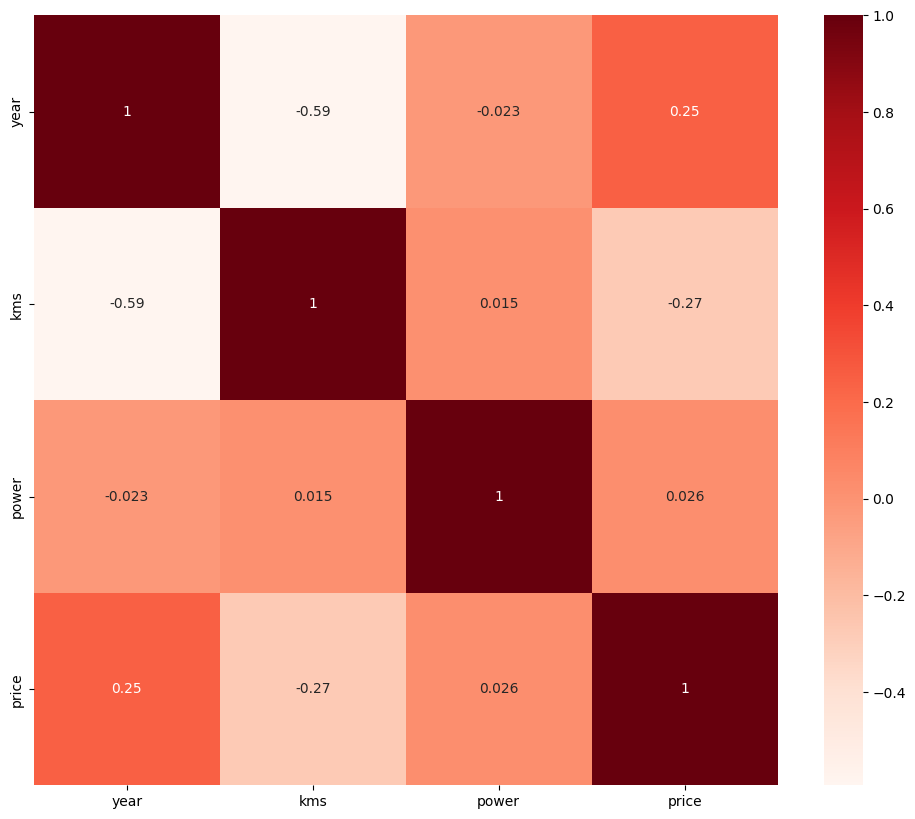

In [9]:
num_var = df_final.select_dtypes(include=[np.number]).columns

#Heat map de correlacion entre las num_var
plt.figure(figsize=(12, 10))
cor = df_final[num_var].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Encoding para ver correlacion de var categóricas

In [ ]:
# One-Hot Encoding de las variables categóricas
df_encoded = pd.get_dummies(df_final, columns=['fuel'])

# Calcular la correlación de las variables codificadas
cor_encoded = df_encoded.corr()

# Mostrar la correlación de las variables codificadas
plt.figure(figsize=(12, 10))
sns.heatmap(cor_encoded, annot=True, cmap=plt.cm.Reds)
plt.show()